# **Project Name**    -Airline Passenger Referral Prediction



# Name: Sudip bairagi

##### **Project Type**    - Classification
##### **Contribution**    - Individual


# **Project Summary -**   The project aims to predict whether a passenger referred by an existing customer will book a flight or not, based on various features such as seat comfort, cabin service, travel class,food beverage , entertainment service, etc. The prediction model is developed using classification techniques in machine learning.The use of machine learning techniques allows for the development of a model that can learn from historical passenger and booking data and make accurate predictions on new data. The model can be used by airlines to target marketing campaigns towards potential passengers who are likely to book a flight based on a referral from an existing customer.IndiGo Airlines is a popular low-cost airline based in India. As an IndiGo passenger, you can expect a streamlined, budget-friendly travel experience with a focus on punctuality and efficiency. IndiGo offers domestic and international flights with a variety of fare options, including basic and premium services. Passengers are encouraged to check in online to save time, and the airline enforces a strict baggage policy, especially for low-cost fares. In-flight services are minimal, with snacks and beverages available for purchase. IndiGo aims to provide affordable, no-frills air travel while maintaining a strong emphasis on customer satisfaction and safety.

Write the summary here within 500-600 words.

# **GitHub Link -**

https://github.com/bairagis/alma-intro-machine-learning

# **Problem Statement**


Write Problem Statement Here.IndiGo Airlines, a leading low-cost carrier in India, faces challenges in maintaining operational efficiency amid rising competition and fluctuating fuel prices. With increasing passenger demand, the airline must enhance customer experience while ensuring on-time performance and cost management. Additionally, it needs to address issues related to workforce management and fleet optimization. As the aviation industry evolves, IndiGo must adopt innovative technologies and sustainable practices to reduce its environmental impact and improve profitability. Strategic planning and agile responses to market trends are essential for sustaining its growth and maintaining its position as a market leader in the competitive airline industry.





# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import missingno as msno
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#libraries for model building
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC
from sklearn.preprocessing import LabelEncoder
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

In [ ]:
#libraries for model evalution
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import recall_score,f1_score,roc_curve, roc_auc_score,precision_score


### Dataset Loading

In [ ]:
# mounting google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Load Dataset

airline_df = pd.read_excel('/content/drive/MyDrive/data_airline_review.xlsx')

### Dataset First View

In [ ]:
# Dataset First Look
airline_df.head()

,airline,overall,author,review_date,customer_review,aircraft,traveller_type,cabin,route,date_flown,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Turkish Airlines,7.0,Christopher Hackley,8th May 2019,âœ… Trip Verified | London to Izmir via Istanb...,NaN,Business,Economy Class,London to Izmir via Istanbul,2019-05-01 00:00:00,4.0,5.0,4.0,4.0,2.0,4.0,yes
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Turkish Airlines,2.0,Adriana Pisoi,7th May 2019,âœ… Trip Verified | Istanbul to Bucharest. We ...,NaN,Family Leisure,Economy Class,Istanbul to Bucharest,2019-05-01 00:00:00,4.0,1.0,1.0,1.0,1.0,1.0,no
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
print(airline_df.shape)

(131895, 17)


### Dataset Information

In [ ]:
# Dataset Info
print(airline_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131895 entries, 0 to 131894
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   airline          65947 non-null  object 
 1   overall          64017 non-null  float64
 2   author           65947 non-null  object 
 3   review_date      65947 non-null  object 
 4   customer_review  65947 non-null  object 
 5   aircraft         19718 non-null  object 
 6   traveller_type   39755 non-null  object 
 7   cabin            63303 non-null  object 
 8   route            39726 non-null  object 
 9   date_flown       39633 non-null  object 
 10  seat_comfort     60681 non-null  float64
 11  cabin_service    60715 non-null  float64
 12  food_bev         52608 non-null  float64
 13  entertainment    44193 non-null  float64
 14  ground_service   39358 non-null  float64
 15  value_for_money  63975 non-null  float64
 16  recommended      64440 non-null  object 
dtypes: float64

#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
airline_df.duplicated().value_counts()

,count
True,70711
False,61184


In [ ]:
#getting duplicate values
print(f' Duplicate data count = {airline_df[airline_df.duplicated()].shape[0]}')
airline_df[airline_df.duplicated()]

 Duplicate data count = 70711


,airline,overall,author,review_date,customer_review,aircraft,traveller_type,cabin,route,date_flown,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131885,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
131887,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
131889,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
131891,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#droping the null values
airline_df.drop_duplicates(inplace = True)

In [ ]:
#count dupicate values
airline_df.duplicated().sum()

0

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
print(airline_df.isnull().sum())

airline                1
overall             1783
author                 1
review_date            1
customer_review        1
aircraft           42696
traveller_type     23644
cabin               2479
route              23671
date_flown         23750
seat_comfort        4973
cabin_service       4944
food_bev           12843
entertainment      20954
ground_service     24015
value_for_money     1857
recommended         1423
dtype: int64


<Axes: >

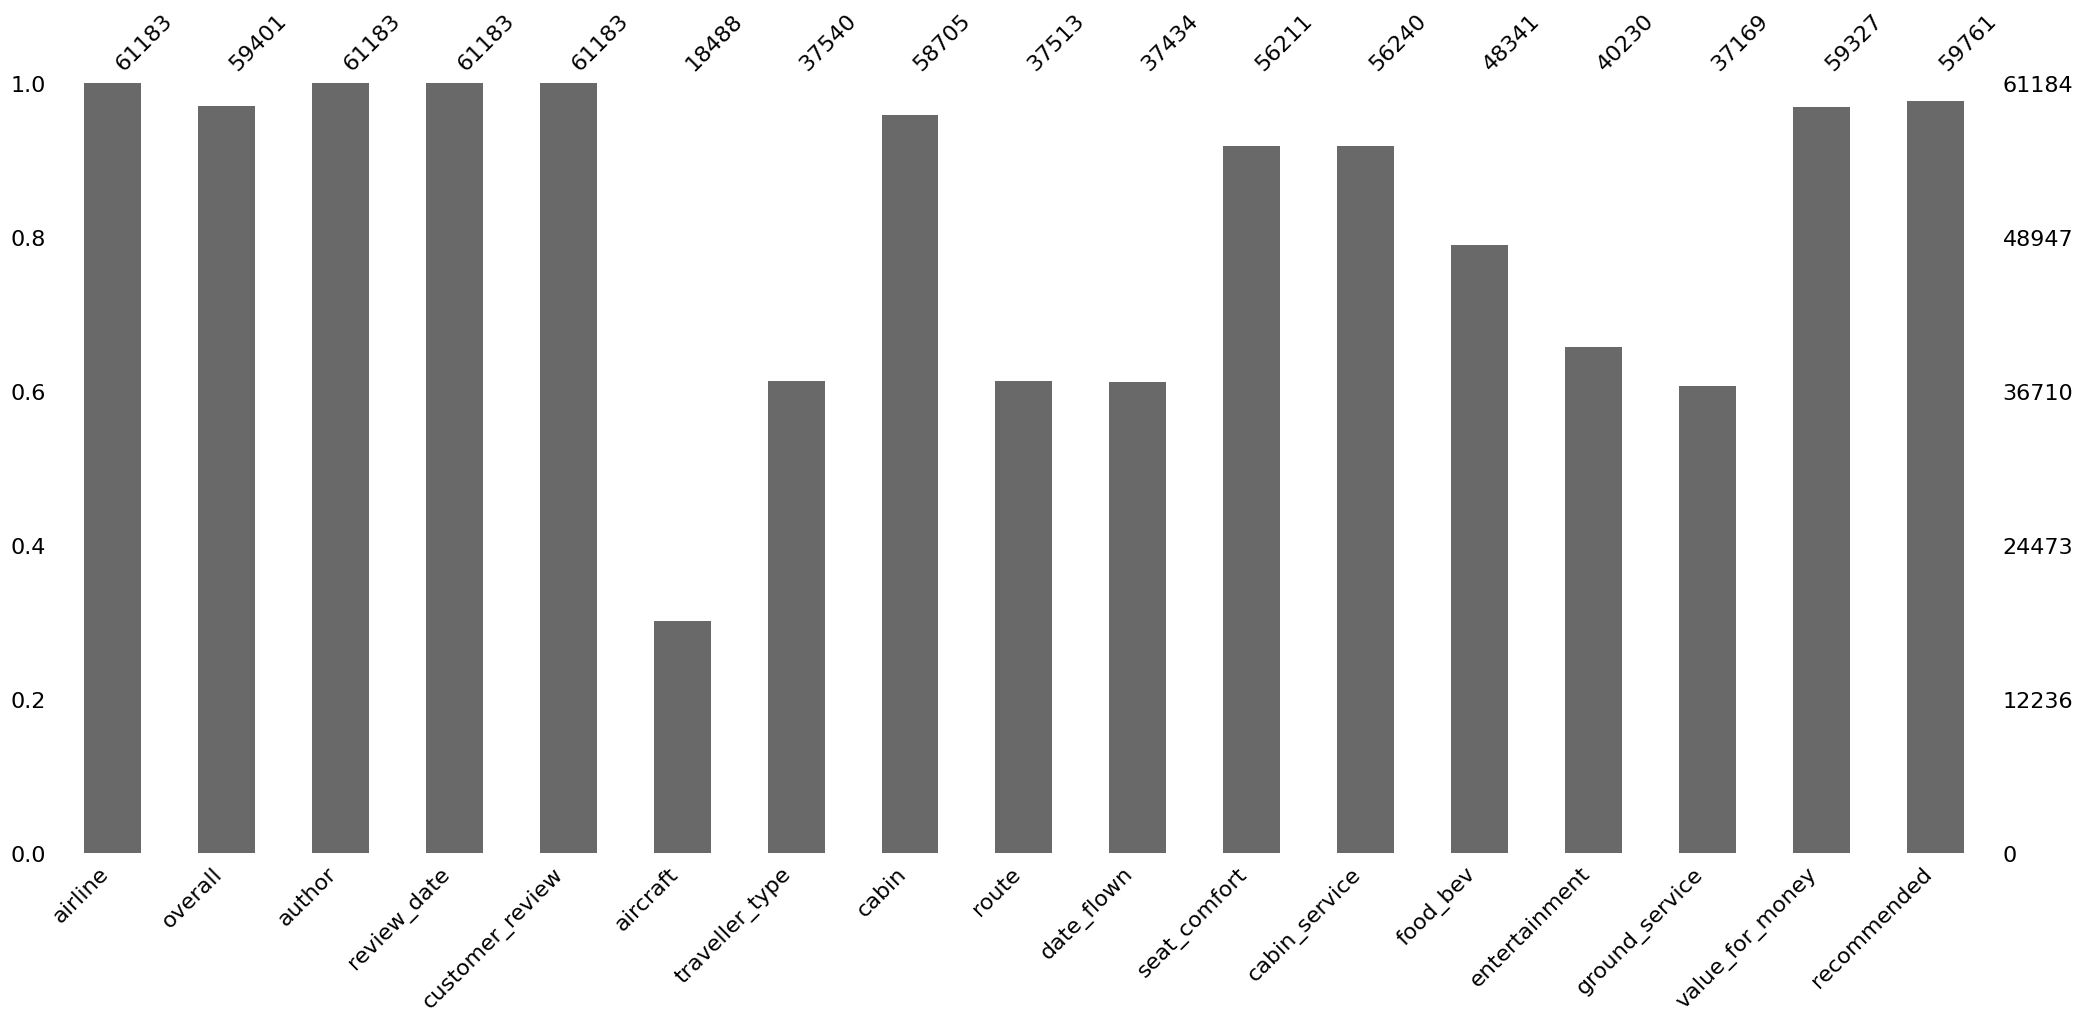

In [ ]:
# Visualizing the missing values
msno.bar(airline_df)

### What did you know about your dataset?

Answer Here(1)Total 131895 rows and 17 columns are present in our dataset
(2)There are 131895 total observation with 17 different features.
(3)All the Feature like aircraft,author and airline has null values.
(4)There are duplicate values i.e., 70711 duplicate data.

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
print(f'Features: {airline_df.columns.to_list()}')

Features: ['airline', 'overall', 'author', 'review_date', 'customer_review', 'aircraft', 'traveller_type', 'cabin', 'route', 'date_flown', 'seat_comfort', 'cabin_service', 'food_bev', 'entertainment', 'ground_service', 'value_for_money', 'recommended']


In [ ]:
# Dataset Describe
airline_df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
airline,61183,81,Spirit Airlines,2871,NaN,NaN,NaN,NaN,NaN,NaN,NaN
overall,59401.0,NaN,NaN,NaN,5.164863,3.483701,1.0,1.0,5.0,9.0,10.0
author,61183,44069,Anders Pedersen,93,NaN,NaN,NaN,NaN,NaN,NaN,NaN
review_date,61183,3015,19th January 2015,198,NaN,NaN,NaN,NaN,NaN,NaN,NaN
customer_review,61183,61172,I flew from Chicago O'Hare to Dublin and from ...,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
aircraft,18488,2088,A320,2130,NaN,NaN,NaN,NaN,NaN,NaN,NaN
traveller_type,37540,4,Solo Leisure,13935,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cabin,58705,4,Economy Class,45171,NaN,NaN,NaN,NaN,NaN,NaN,NaN
route,37513,24549,BKK to LHR,31,NaN,NaN,NaN,NaN,NaN,NaN,NaN
date_flown,37434,63,August 2015,1127,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Variables Description

Answer Here• airline:Name of the airline

• overall : Overall point is given to the trip between 1 to 10.

• author : Author of the trip

• review_date : Date of the Review

• customer_review : Review of the customers in free text format

• aircraft : Type of the aircraft

• traveller_type : Type of traveller(e.g. business,lesisure)

• cabin : Cabin at the flight date flowan: Flight date

• seat_comfort : Rated between 1-5

• cabin_service : Rated between 1-5

• food_bev : Rated between 1-5

• entertainment : Rated between 1-5

• ground_service : Rated between 1-5

• value_for_money : Rated between 1-5

• recommended : Binary, target variable

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
for i in airline_df.columns.tolist():
  print(f'Number of unique value in {i} is {airline_df[i].nunique()}.')

Number of unique value in airline is 81.
Number of unique value in overall is 10.
Number of unique value in author is 44069.
Number of unique value in review_date is 3015.
Number of unique value in customer_review is 61172.
Number of unique value in aircraft is 2088.
Number of unique value in traveller_type is 4.
Number of unique value in cabin is 4.
Number of unique value in route is 24549.
Number of unique value in date_flown is 63.
Number of unique value in seat_comfort is 5.
Number of unique value in cabin_service is 5.
Number of unique value in food_bev is 5.
Number of unique value in entertainment is 5.
Number of unique value in ground_service is 5.
Number of unique value in value_for_money is 5.
Number of unique value in recommended is 2.


## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# Write your code to make your dataset analysis ready.
airline_df=airline_df.copy()



In [ ]:
# Checking the copy
airline_df

,airline,overall,author,review_date,customer_review,aircraft,traveller_type,cabin,route,date_flown,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Turkish Airlines,7.0,Christopher Hackley,8th May 2019,âœ… Trip Verified | London to Izmir via Istanb...,NaN,Business,Economy Class,London to Izmir via Istanbul,2019-05-01 00:00:00,4.0,5.0,4.0,4.0,2.0,4.0,yes
3,Turkish Airlines,2.0,Adriana Pisoi,7th May 2019,âœ… Trip Verified | Istanbul to Bucharest. We ...,NaN,Family Leisure,Economy Class,Istanbul to Bucharest,2019-05-01 00:00:00,4.0,1.0,1.0,1.0,1.0,1.0,no
5,Turkish Airlines,3.0,M Galerko,7th May 2019,âœ… Trip Verified | Rome to Prishtina via Ista...,NaN,Business,Economy Class,Rome to Prishtina via Istanbul,2019-05-01 00:00:00,1.0,4.0,1.0,3.0,1.0,2.0,no
7,Turkish Airlines,10.0,Zeshan Shah,6th May 2019,âœ… Trip Verified | Flew on Turkish Airlines I...,A330,Solo Leisure,Economy Class,Washington Dulles to Karachi,April 2019,4.0,5.0,5.0,5.0,5.0,5.0,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131886,Ukraine International,NaN,Yevheniy Kahanovych,21st January 2007,Two domestic flights between Kiev and Lviv las...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no
131888,Ukraine International,NaN,Helen Lee,15th December 2006,I had a good flight from London to Kiev with U...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no
131890,Ukraine International,NaN,Andriy Yesypenko,19th May 2006,Kiev - London (Gatwick) in business class (in ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no
131892,Ukraine International,NaN,Volodya Bilotkach,29th April 2006,Several flights - KBP to AMS (3 times one way)...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no


### What all manipulations have you done and insights you found?

Answer Here.

#3. EDA

####  Chart 1:Displot for distribution

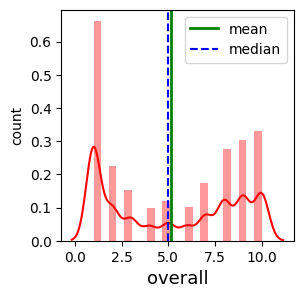

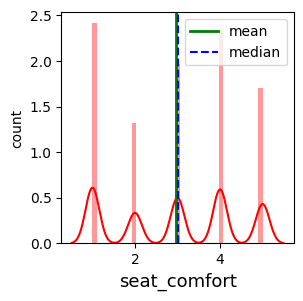

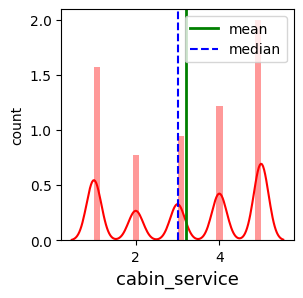

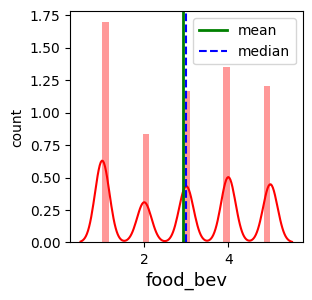

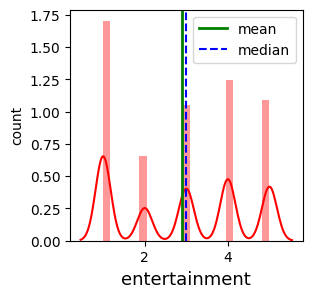

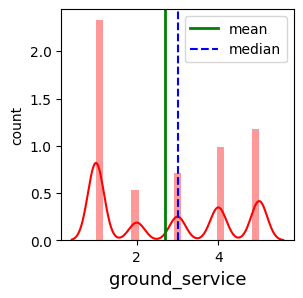

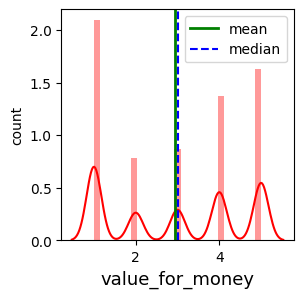

In [ ]:
# Chart - 1 visualization code
for col in [ 'overall',   'seat_comfort', 'cabin_service', 'food_bev', 'entertainment', 'ground_service', 'value_for_money']:
  plt.figure(figsize=(3,3))
  sns.distplot(airline_df[col], color='r')
  plt.xlabel(col, fontsize=13)
  plt.ylabel('count')

# Plotting the mean and the median.
  plt.axvline(airline_df[col].mean(),color='green',linewidth=2,label='mean')
  plt.axvline(airline_df[col].median(),color='blue',linestyle='dashed',linewidth=1.5,label='median')
  plt.legend(bbox_to_anchor = (1.0, 1), loc = 'upper right')
  plt.show()

##### 1. Why did you pick the specific chart?

##### 2. What is/are the insight(s) found from the chart?

Answer Here 1.Because this specific chart is easy to understand.
2.And this chart is easy for execute


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here 1.yes we get positive impact custmere what they want

# Chart 2:Which Traveller_type has more ratings?

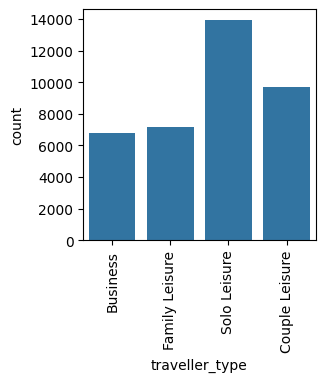

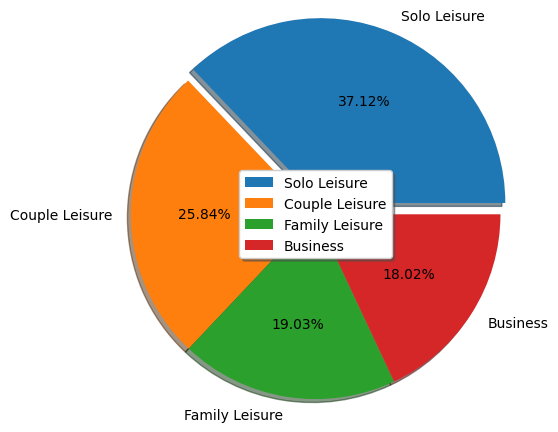

In [ ]:
#set the fig size and plotting the graph
airline_df.dropna(subset=['traveller_type'],inplace=True)
plt.figure(figsize=(3,3))
sns.countplot(x=airline_df['traveller_type'],data=airline_df)
plt.xticks(rotation=90)
plt.show()

print(" ")

label_for_traveller = ['Solo Leisure','Couple Leisure','Family Leisure','Business']
data1 = airline_df['traveller_type'].value_counts().values
explode = [0.1, 0, 0, 0]
plt.figure(figsize=(4,4))
plt.axis("equal")
plt.pie(data1, labels = label_for_traveller,explode=explode,radius=1.5,autopct='%0.2f%%',shadow=True,textprops={'fontsize': 10})
plt.legend(loc='center',shadow=True,fancybox=True)
plt.show()


• As we can see above graph,Solo Lesisure has the highest value counts, we can conclude that most people who travel by airline travel is solo.37.22% people who travel by airline is solo.Followed by couple and family.

# Chart 3:Which type of Cabin has more recommendation?

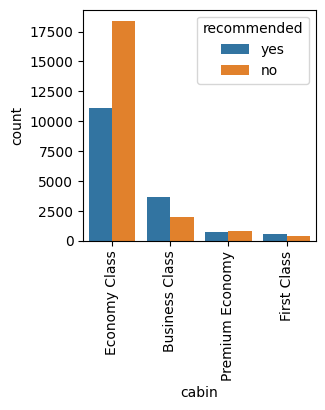

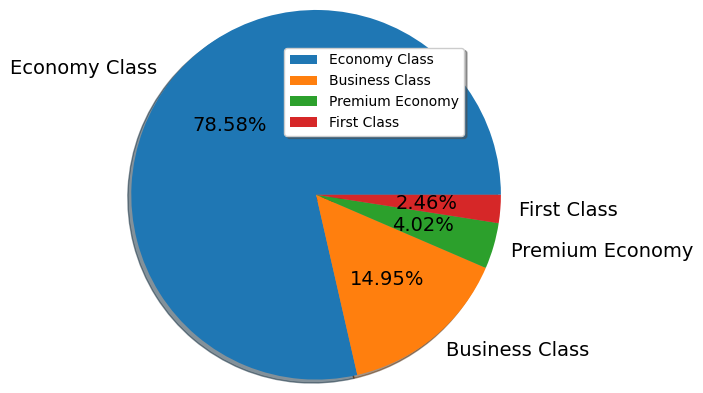

In [ ]:
#setting the figure size and plotting the graph
airline_df.dropna(subset=['recommended'],inplace=True)
plt.figure(figsize=(3,3))
sns.countplot(x=airline_df['cabin'],hue=airline_df['recommended'])
plt.xticks(rotation=90)
plt.show()

print(" ")


label_for_cabin = ['Economy Class','Business Class','Premium Economy','First Class']
data2 = airline_df['cabin'].value_counts().values
plt.figure(figsize=(4,4))
plt.axis("equal")
plt.pie(data2, labels = label_for_cabin,radius=1.5,autopct='%0.2f%%',shadow=True,textprops={'fontsize': 14})
plt.legend(loc='upper right',shadow=True,fancybox=True)
plt.show()

• As we can see above graph,Economy class has the highest counts with bad ratings.

• We can conclude that most of the people around 78.44% people choose economy class to travel by airline.Followed by Business class and others

# Chart 4:Percentage of Cabin-Service Rating by passengers

cabin_service
5.0    10715
1.0     9735
4.0     6100
3.0     5367
2.0     4568
Name: count, dtype: int64
[10715  9735  6100  5367  4568]


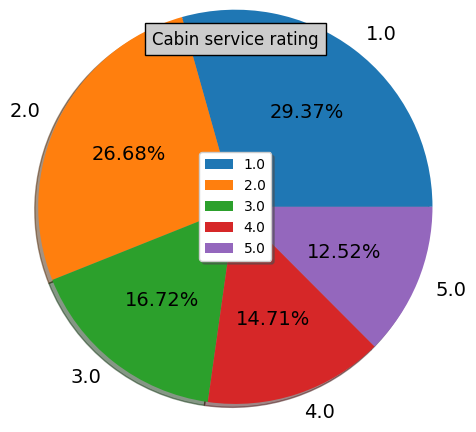

In [ ]:
#setting the figure size and plotting the graph
label_for_cabin_service = ['1.0','2.0','3.0','4.0','5.0']
data3 = airline_df['cabin_service'].value_counts().values
print(airline_df['cabin_service'].value_counts())
print(data3)
plt.figure(figsize=(4,4))
plt.axis("equal")
plt.title('Cabin service rating',bbox={'facecolor':'0.8', 'pad':5})
plt.pie(data3, labels = label_for_cabin_service,radius=1.6,autopct='%0.2f%%',shadow=True,textprops={'fontsize': 14})
plt.legend(loc='center',shadow=True,fancybox=True)
plt.show()

• 24% passengers are not satisfied with cabin-service as they give 1.0 rating.

• 50% passenger are giving 4.0 and 5.0 rating for cabin-service when overall rating of airline is good.So,we can say good cabin-service positively impacts airline businesses

# Chart 5: In Economy Class what is the average ratings of Food_bev and entertainment given by passenger?

<Axes: xlabel='cabin'>

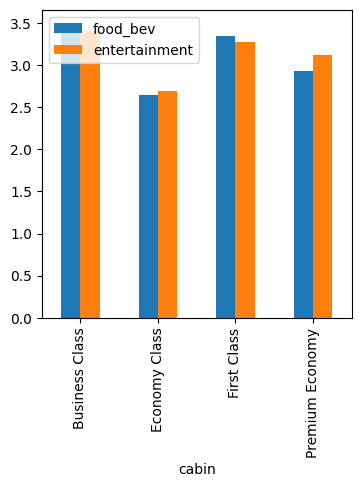

In [ ]:
gp_by_cabin=airline_df.groupby('cabin')[['food_bev','entertainment']].mean().reset_index()
plt.rcParams['figure.figsize']=(4,4)
gp_by_cabin.plot(x="cabin", y=["food_bev", "entertainment"], kind="bar")


• From above graph, In Economy Class the average ratings of Food_bev and entertainment given by passenger is lowest compared to other cabin classes.

# Chart 6:Percentage of Food-Beverage Rating by passengers

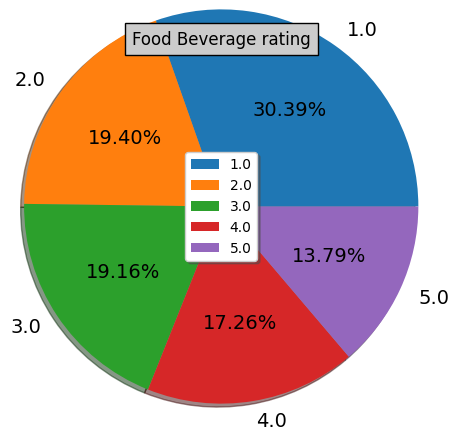

In [ ]:
#setting the figure size and plotting the graph
label_for_food_service = ['1.0','4.0','5.0','3.0','2.0']
data3 = airline_df['food_bev'].value_counts().values
plt.figure(figsize=(4,4))
plt.axis("equal")
plt.title('Food Beverage rating',bbox={'facecolor':'0.8', 'pad':5})
plt.pie(data3, labels = label_for_cabin_service,radius=1.6,autopct='%0.2f%%',shadow=True,textprops={'fontsize': 14})
plt.legend(loc='center',shadow=True,fancybox=True)
plt.show()

• 27% passengers are not satisfied with food-service as they giving 1.0 rating.

• 36% passengers are giving 4.0 and 5.0 rating for food service so we conclude that overall rating of arline is good.So,we can say good food beverage service positively impacts airline businesses.

# Chart 7:Variation of Recommendation feature with Seat comfort

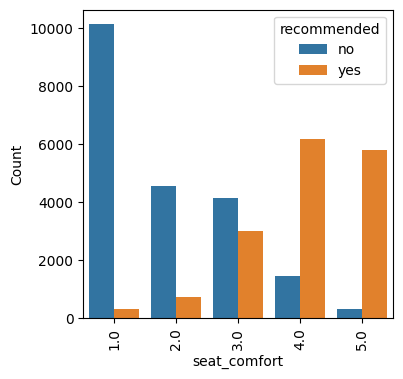

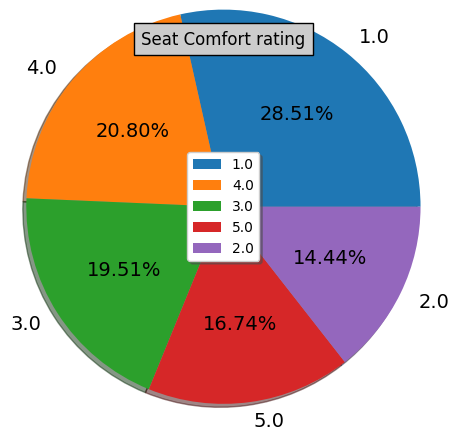

In [ ]:
#setting the figure size and plotting the graph
airline_df.dropna(subset=['recommended'],inplace=True)
plt.figure(figsize=(4,4))
sns.countplot(x=airline_df['seat_comfort'],hue=airline_df['recommended'])
plt.xlabel('seat_comfort')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

print(" ")
label_for_seat_service = ['1.0','4.0','3.0','5.0','2.0']
data4 = airline_df['seat_comfort'].value_counts().values
plt.figure(figsize=(4,4))
plt.axis("equal")
plt.title('Seat Comfort rating',bbox={'facecolor':'0.8', 'pad':5})
plt.pie(data4, labels = label_for_seat_service,radius=1.6,autopct='%0.2f%%',shadow=True,textprops={'fontsize': 14})
plt.legend(loc='center',shadow=True,fancybox=True)
plt.show()

• In seat comfort people has given highest positive recommended to the seat of class 5 as compared to very low negative recommendation to the same.

• Also we can see seat class 1 have been given highest negative recommendation as compare to it's positive recommendation.Here we come to a conclusion it must be removed as early as possible.

• 25% people are not satisfied with seat comfort.As they give 1.0 rating.

• 42% people are giving 4.0 and 5.0 rating for seat comfort.So overall rating is good.So we can say that good value for seat comfort service positively impact airline business.

# Chart 8: Variation of Recommendation feature with entertainment

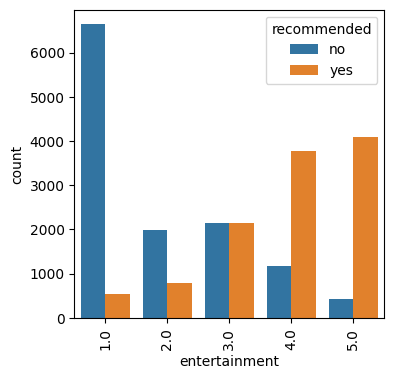

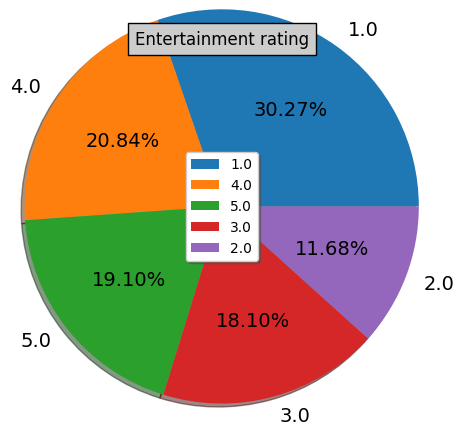

In [ ]:
#setting the figure size and plotting the graph
airline_df.dropna(subset=['recommended'],inplace=True)
plt.figure(figsize=(4,4))
sns.countplot(x=airline_df['entertainment'],hue=airline_df['recommended'])
plt.xlabel('entertainment')
plt.ylabel('count')
plt.xticks(rotation=90)
plt.show()

print(" ")

label_for_ent_service = ['1.0','4.0','5.0','3.0','2.0']
data5 = airline_df['entertainment'].value_counts().values
plt.figure(figsize=(4,4))
plt.axis("equal")
plt.title('Entertainment rating',bbox={'facecolor':'0.8', 'pad':5})
plt.pie(data5, labels = label_for_ent_service,radius=1.6,autopct='%0.2f%%',shadow=True,textprops={'fontsize': 14})
plt.legend(loc='center',shadow=True,fancybox=True)
plt.show()

• In entertainment also we can see most of the people give highest negative recommendation to entertainment rating 1 which shows that airline has to improve their entertainment system as well.

• 30% people are not satisfied with entertainment service.As they give 1.0 rating.

• 38% people are giving 4.0 and 5.0 rating for seat comfort.So overall rating is bad.So we can say that bad value for entertainment service negatively impact airline business.

# chart 9:Variation of Recommendation feature with value_for_money

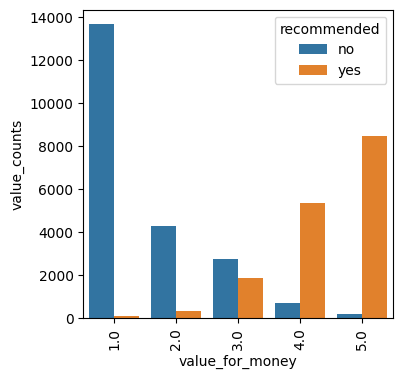

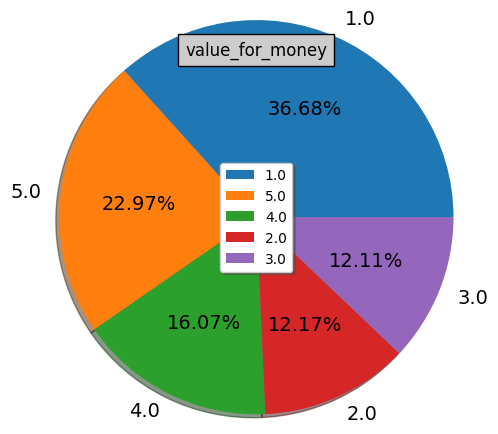

In [ ]:
#setting the figure size and plotting the graph
airline_df.dropna(subset=['recommended'],inplace=True)
plt.figure(figsize=(4,4))
sns.countplot(x=airline_df['value_for_money'],hue=airline_df['recommended'])
plt.xlabel('value_for_money')
plt.ylabel('value_counts')
plt.xticks(rotation=90)
plt.show()

print(" ")

label_for_money = ['1.0','5.0','4.0','2.0','3.0']
data6 = airline_df['value_for_money'].value_counts().values
plt.figure(figsize=(4,4))
plt.axis("equal")
plt.title('value_for_money',bbox={'facecolor':'0.8', 'pad':5})
plt.pie(data6, labels = label_for_money,radius=1.6,autopct='%0.2f%%',shadow=True,textprops={'fontsize': 14})
plt.legend(loc='center',shadow=True,fancybox=True)
plt.show()

• In value_for_money people has given highest positive recommended to the money value of class 5 as compared to very low negative recommendation to the same.

• Also we can see seat class 1 have been given highest negative recommendation as compare to it's positive recommendation.Here we come to a conclusion it must be removed as early as possible.

• 36% people are not satisfied with value_for_money service.As they give 1.0 rating.40% people are giving 4.0 and 5.0 rating for value_for_money.So overall rating is avg.So we can say that avg value for money service may be negatively impact airline business.

# Chart 10:Percentage of overall rating by passengers




overall
1.0     12621
10.0     4361
9.0      4083
2.0      3801
8.0      3655
3.0      2421
7.0      2315
5.0      1481
4.0      1439
6.0      1361
Name: count, dtype: int64


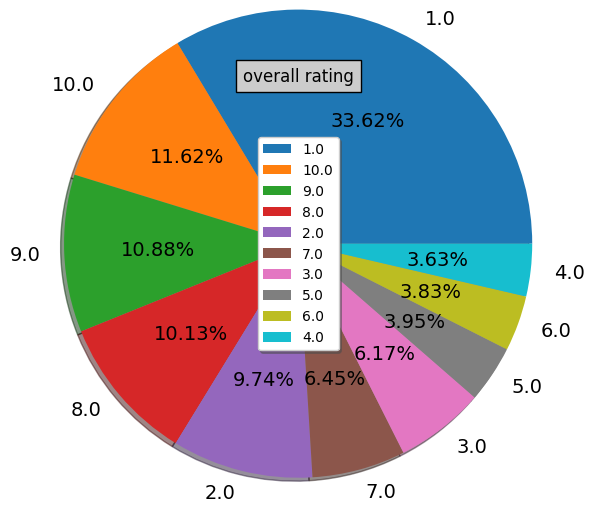

In [ ]:
#setting the fig size and plotting the graph
label_for_overall_rating = ['1.0','10.0','9.0','8.0','2.0','7.0','3.0','5.0','6.0','4.0']
data7 = airline_df['overall'].value_counts().values
print(airline_df['overall'].value_counts())
plt.figure(figsize=(4,4))
plt.axis("equal")
plt.title('overall rating',bbox={'facecolor':'0.8', 'pad':5})
plt.pie(data7, labels = label_for_overall_rating,radius=1.9,autopct='%0.2f%%',shadow=True,textprops={'fontsize': 14})
plt.legend(loc='center',shadow=True,fancybox=True)
plt.show()

• 45% of passengers gave an overall rating of 7 and above on a scale of 10,for the services offered by the airlines.It implies that this section of people think that airline are giving good services.

• 42% passengers gave an overall rating below 3.0 . So it,suggests that people are not very much satisfied with airline services.There are still need of improvements

# 4.Data Cleaning

Droping Unnecessary Columns

In [ ]:
#count percentage wise missing values
def missing_value_check(df):
  per_miss_values = airline_df.isnull().sum() * 100 / len(airline_df)
  miss_values_df = pd.DataFrame({'Feature_name':airline_df.columns,
                                 'percentage':per_miss_values})
  return miss_values_df.sort_values('percentage',ascending=False)

In [ ]:
#checking percentage wise missing values
missing_value_check(airline_df)

,Feature_name,percentage
aircraft,aircraft,50.757878
entertainment,entertainment,36.785743
food_bev,food_bev,20.994166
cabin_service,cabin_service,2.807747
seat_comfort,seat_comfort,2.645249
ground_service,ground_service,0.990969
date_flown,date_flown,0.285037
route,route,0.079917
cabin,cabin,0.050614
value_for_money,value_for_money,0.010656


In [ ]:
#check unique aircraft names
airline_df.aircraft.unique()

array([nan, 'A330', 'Boeing 737-800 / A330-300', ...,
       'Boeing 737-800 and Embraer 190', 'Boeing 737-400/ 737-800',
       'boeing 767'], dtype=object)

In [ ]:
#check number of unique values in aircraft
airline_df.aircraft.nunique()

2087

In [ ]:
airline_df = airline_df.drop(['aircraft'],axis=1)

In [ ]:
#drop unnecessary columns,which are not for our use
airline_df = airline_df.drop(['author','review_date', 'route', 'date_flown', 'customer_review'],axis=1)

In [ ]:
airline_df.head()

,airline,overall,traveller_type,cabin,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended
1,Turkish Airlines,7.0,Business,Economy Class,4.0,5.0,4.0,4.0,2.0,4.0,yes
3,Turkish Airlines,2.0,Family Leisure,Economy Class,4.0,1.0,1.0,1.0,1.0,1.0,no
5,Turkish Airlines,3.0,Business,Economy Class,1.0,4.0,1.0,3.0,1.0,2.0,no
7,Turkish Airlines,10.0,Solo Leisure,Economy Class,4.0,5.0,5.0,5.0,5.0,5.0,yes
9,Turkish Airlines,1.0,Solo Leisure,Economy Class,1.0,1.0,1.0,1.0,1.0,1.0,no


In [ ]:
#remove null value from recommended column
airline_df.dropna(subset=['recommended'],inplace=True)

In [ ]:
#handle na values in traveller_type column
airline_df['traveller_type'].fillna(method='ffill',inplace=True)

In [ ]:
#handle na values in cabin column
airline_df['cabin'].fillna(airline_df['cabin'].mode().values[0],inplace=True)

In [ ]:
airline_df.head()

,airline,overall,traveller_type,cabin,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended
1,Turkish Airlines,7.0,Business,Economy Class,4.0,5.0,4.0,4.0,2.0,4.0,yes
3,Turkish Airlines,2.0,Family Leisure,Economy Class,4.0,1.0,1.0,1.0,1.0,1.0,no
5,Turkish Airlines,3.0,Business,Economy Class,1.0,4.0,1.0,3.0,1.0,2.0,no
7,Turkish Airlines,10.0,Solo Leisure,Economy Class,4.0,5.0,5.0,5.0,5.0,5.0,yes
9,Turkish Airlines,1.0,Solo Leisure,Economy Class,1.0,1.0,1.0,1.0,1.0,1.0,no


In [ ]:
#checking null values after data cleaning
missing_value_check(airline_df)

,Feature_name,percentage
entertainment,entertainment,36.785743
food_bev,food_bev,20.994166
cabin_service,cabin_service,2.807747
seat_comfort,seat_comfort,2.645249
ground_service,ground_service,0.990969
value_for_money,value_for_money,0.010656
overall,overall,0.002664
airline,airline,0.000000
traveller_type,traveller_type,0.000000
cabin,cabin,0.000000


After data cleaning,no missing values are found



In [ ]:
airline_df.shape

(37539, 11)

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.Null Hypothesis (H0): There is no significant difference or effect. For example, "There is no difference in the average test scores between students who study with a tutor and those who study independently."

Alternate Hypothesis (H1): There is a significant difference or effect. For example, "Students who study with a tutor have higher average test scores than those who study independently."

Feel free to customize these based on your specific research context!





#### 2. Perform an appropriate statistical test.

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.Type of Data: Different tests are appropriate for different types of data (e.g., continuous vs. categorical).

Distribution: Tests assume certain data distributions (e.g., normality for t-tests).

Research Question: The test should align with the hypothesis being tested (e.g., comparing means, proportions, or relationships).

Number of Groups: The number of groups or samples being compared dictates the test (e.g., one-sample, two-sample, ANOVA for multiple groups).

By considering these factors, you can select the most suitable test for your analysis.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.Null Hypothesis (H0): There is no significant difference in the average height between males and females in the population.

Alternate Hypothesis (H1): There is a significant difference in the average height between males and females in the population.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.1.t-Test: Used to compare the means of two groups (e.g., independent samples t-test for two different groups, paired t-test for related groups).

2.ANOVA (Analysis of Variance): Used when comparing the means of three or more groups. It tests the null hypothesis that all group means are equal.

##### Why did you choose the specific statistical test?

Answer Here.Data Type: The hypotheses involve comparing means, which typically requires tests like t-tests or ANOVA for continuous data.

Distribution Assumptions: If the data is normally distributed, a t-test is appropriate; if not, a non-parametric test may be needed.

Sample Size: The size of the sample influences the choice; smaller samples may require specific tests like the Welch's t-test if variances are unequal.

Number of Groups: Since the hypothesis compares two groups (males and females), a t-test (for two independent samples) is suitable.

#6. Feature Engineering

## Correlation Matrix

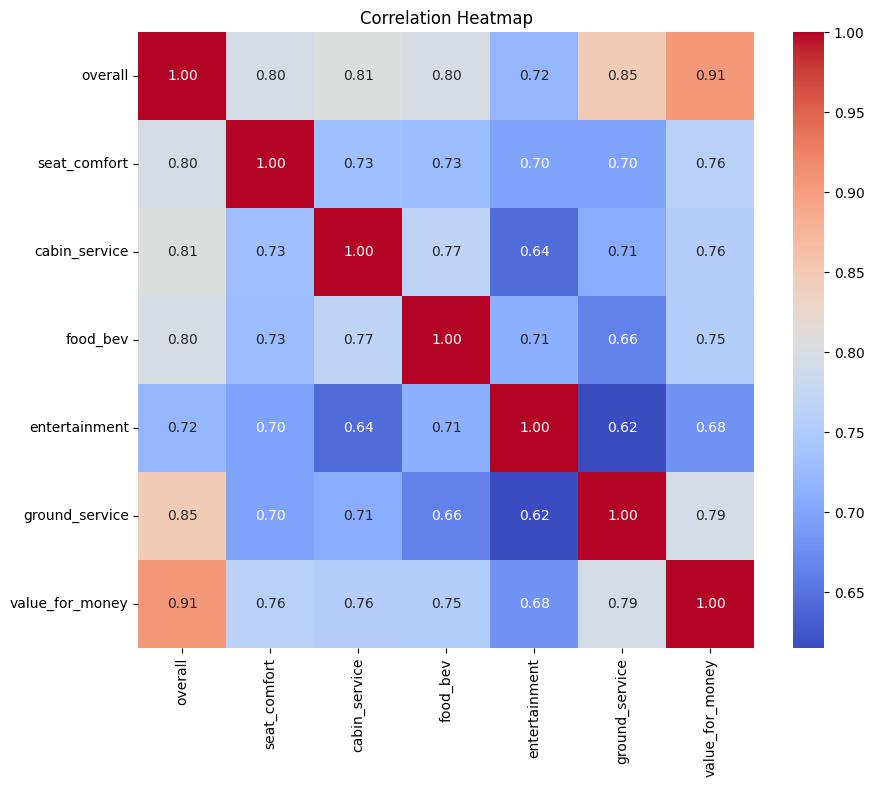

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load your dataset (make sure 'airline_df' is defined)
# airline_df = pd.read_csv('your_airline_data.csv')  # Uncomment and set your path

# Step 1: Select only numeric columns for correlation
numeric_df = airline_df.select_dtypes(include=[np.number])

# Step 2: Calculate the correlation matrix
correlation_matrix = numeric_df.corr()

# Step 3: Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Correlation Heatmap')
plt.show()


overall feature has a highest correlation value than other,so drop overall column.

# Removing Multicollinearity features

In [ ]:
#Creating a function to remove multicollinear
def calc_vif(X):

  # Calculating VIF
   vif = pd.DataFrame()
   vif["variables"] = X.columns
   vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

   return(vif)

In [ ]:
#drop overall column
airline_df.drop(['overall'],axis=1,inplace=True)

In [ ]:
#drop airline column
airline_df.drop(['airline'],axis=1,inplace=True)

In [ ]:
airline_df.head()

,traveller_type,cabin,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended
1,Business,Economy Class,4.0,5.0,4.0,4.0,2.0,4.0,yes
3,Family Leisure,Economy Class,4.0,1.0,1.0,1.0,1.0,1.0,no
5,Business,Economy Class,1.0,4.0,1.0,3.0,1.0,2.0,no
7,Solo Leisure,Economy Class,4.0,5.0,5.0,5.0,5.0,5.0,yes
9,Solo Leisure,Economy Class,1.0,1.0,1.0,1.0,1.0,1.0,no


# Label Encoding

In [ ]:
#converting target column
airline_df['recommended'].replace({'yes':1,'no':0},inplace=True)

In [ ]:
airline_df.head()

,traveller_type,cabin,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended
1,Business,Economy Class,4.0,5.0,4.0,4.0,2.0,4.0,1
3,Family Leisure,Economy Class,4.0,1.0,1.0,1.0,1.0,1.0,0
5,Business,Economy Class,1.0,4.0,1.0,3.0,1.0,2.0,0
7,Solo Leisure,Economy Class,4.0,5.0,5.0,5.0,5.0,5.0,1
9,Solo Leisure,Economy Class,1.0,1.0,1.0,1.0,1.0,1.0,0


# Defining Independent And Dependent Features

In [ ]:
#seperate independent and dependentfeatures
y = airline_df['recommended']
x = airline_df.drop(columns='recommended')

# One Hot Encoding

In [ ]:
#encoding
x = pd.get_dummies(x)
x

,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,traveller_type_Business,traveller_type_Couple Leisure,traveller_type_Family Leisure,traveller_type_Solo Leisure,cabin_Business Class,cabin_Economy Class,cabin_First Class,cabin_Premium Economy
1,4.0,5.0,4.0,4.0,2.0,4.0,True,False,False,False,False,True,False,False
3,4.0,1.0,1.0,1.0,1.0,1.0,False,False,True,False,False,True,False,False
5,1.0,4.0,1.0,3.0,1.0,2.0,True,False,False,False,False,True,False,False
7,4.0,5.0,5.0,5.0,5.0,5.0,False,False,False,True,False,True,False,False
9,1.0,1.0,1.0,1.0,1.0,1.0,False,False,False,True,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131706,1.0,2.0,1.0,NaN,2.0,2.0,True,False,False,False,False,True,False,False
131708,3.0,1.0,NaN,NaN,1.0,3.0,False,True,False,False,False,True,False,False
131710,2.0,2.0,NaN,NaN,4.0,1.0,False,False,False,True,False,True,False,False
131712,1.0,1.0,1.0,3.0,1.0,5.0,False,True,False,False,False,True,False,False


# Handling Class Imbalance

The Percentage of No labels of Target Variable is 57.0
The Percentage of Yes labels of Target Variable is 43.0


<Axes: xlabel='recommended', ylabel='count'>

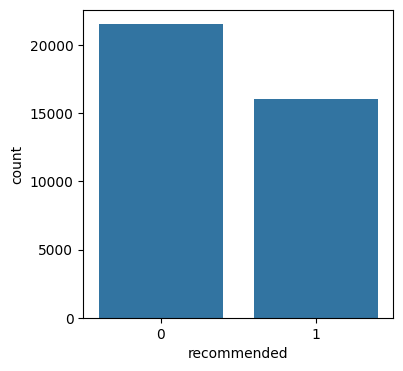

In [ ]:
print("The Percentage of No labels of Target Variable is",np.round(y.value_counts()[0]/len(y)*100))
print("The Percentage of Yes labels of Target Variable is",np.round(y.value_counts()[1]/len(y)*100))
sns.countplot(x=airline_df['recommended'],data=airline_df)

# 7. Model Building

# 1.Logistic Regression

# Logistic Regression With Cross Validation

In [ ]:
#cross validation
grid = {'C':10.0 **np.arange(-2,3),'penalty':['l1','l2','elasticnet','none']}
cv = KFold(n_splits=5,random_state=None,shuffle=False)

In [ ]:
#hyper parameter tuning
clf_logclass = GridSearchCV(log_class,grid,cv=cv,n_jobs=-1,scoring='f1_macro')

In [ ]:
#cross validation
!pip install numpy
import numpy as np
from sklearn.model_selection import KFold
grid = {'C':10.0 **np.arange(-2,3),'penalty':['l2', None]} # Changed penalty options
cv = KFold(n_splits=5,random_state=None,shuffle=False)

#hyper parameter tuning
from sklearn.model_selection import GridSearchCV
clf_logclass = GridSearchCV(log_class,grid,cv=cv,n_jobs=-1,scoring='f1_macro')


# Handling Missing Values before fitting
import pandas as pd
from sklearn.impute import SimpleImputer

# Assuming x_train is a pandas DataFrame or NumPy array
imputer = SimpleImputer(strategy='mean')  # Or another strategy like 'median', 'most_frequent'
x_train = imputer.fit_transform(x_train)

# Now you can fit the model
clf_logclass.fit(x_train,y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(max_iter=10000), n_jobs=-1,
             param_grid={'C': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]),
                         'penalty': ['l2', None]},
             scoring='f1_macro')

# 2.Decision Tree Classifier

In [ ]:
#Intialize decision tree model
decision_tree_class = DecisionTreeClassifier()


In [ ]:
#fit training data
decision_tree_class.fit(x_train,y_train)

DecisionTreeClassifier()

In [ ]:
#predict the result
y_pred_decision_tree = decision_tree_class.predict(x_test)

In [ ]:
#training and testing score
print(decision_tree_class.score(x_train,y_train))
print(decision_tree_class.score(x_test,y_test))

0.9877126968798908
0.9147575919019713


In [ ]:
##report of decision tree classifier
report_dt = classification_report(y_test, y_pred_decision_tree)
print(report_dt)

              precision    recall  f1-score   support

           0       0.92      0.93      0.93      4239
           1       0.91      0.89      0.90      3269

    accuracy                           0.91      7508
   macro avg       0.91      0.91      0.91      7508
weighted avg       0.91      0.91      0.91      7508



<Axes: >

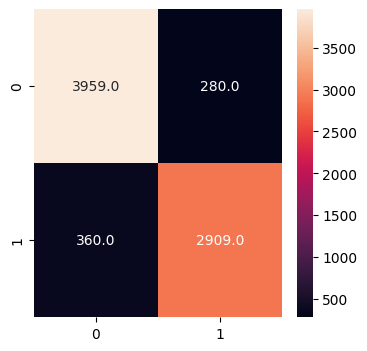

In [ ]:
#confusion matrix for decision tree classifier
con_mat_decision_tree = confusion_matrix(y_test,y_pred_decision_tree)

#plotting the confusion matrix
sns.heatmap(con_mat_decision_tree,annot=True,fmt='.1f')

As we can see, accuracy score is 92%. And also difference between training and testing score is more,so overfitting is occur.

Apply hyper-parameter tuning , to overcome overfitting problem.



# Decision Tree With Hyper-Parameter tuning

In [ ]:
#preprunning
params = {
    'criterion':['gini','entropy','logloss'],
    'splitter' : ['best','random'],
    'max_depth':[5,6,7,8],
    'max_features':['auto','sqrt','log2'],
    "min_samples_split":[5,7]
    # "min_samples_leaf":[2,3]
}

In [ ]:
#hyper-parametr tuning
clf_decision_tree = GridSearchCV(decision_tree_class,params,cv=cv,n_jobs=-1,scoring='accuracy')

In [ ]:
# Define the parameter grid for tuning
params = {
    'criterion': ['gini', 'entropy', 'log_loss'],
    'splitter': ['best', 'random'],
    'max_depth': [5, 6, 7, 8],
    'max_features': ['auto', 'sqrt', 'log2'],
    "min_samples_split": [5, 7]
    # "min_samples_leaf":[2,3]
}

# Initialize the RandomForestClassifier
clf_rf = RandomForestClassifier()

# Initialize GridSearchCV with the classifier and parameters
clf_decision_tree = GridSearchCV(clf_rf, params, cv=cv, n_jobs=-1, scoring='accuracy')

# Fit the model to the training data
clf_rf.fit(x_train, y_train)

RandomForestClassifier()

In [ ]:
# Import necessary libraries
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

# Assuming x_train, y_train, x_test, y_test, and cv are defined

# Define the parameter grid for tuning
params = {
    'criterion': ['gini', 'entropy', 'log_loss'],
    'splitter': ['best', 'random'],
    'max_depth': [5, 6, 7, 8],
    'max_features': ['auto', 'sqrt', 'log2'],
    "min_samples_split": [5, 7]
    # "min_samples_leaf":[2,3]
}

# Initialize the DecisionTreeClassifier or RandomForestClassifier
# Choose the classifier you intend to use:
clf_decision_tree = DecisionTreeClassifier() # If you intend to use DecisionTreeClassifier
# OR
# clf_decision_tree = RandomForestClassifier() # If you intend to use RandomForestClassifier

# Initialize GridSearchCV with the classifier and parameters
clf_decision_tree = GridSearchCV(clf_decision_tree, params, cv=cv, n_jobs=-1, scoring='accuracy')

# Fit the model to the training data
clf_decision_tree.fit(x_train, y_train) # Use clf_decision_tree for fitting

# Predict on the test set
y_pred_decision_tree_hyper = clf_decision_tree.predict(x_test) # Get predictions

#confusion matrix
con_mat_dt_hyper = confusion_matrix(y_test, y_pred_decision_tree_hyper)
print(con_mat_dt_hyper)

[[4079  160]
 [ 315 2954]]


<Axes: >

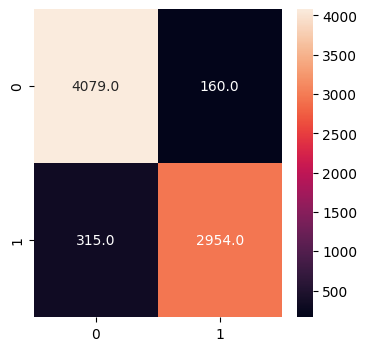

In [ ]:
#plot confusion matrix
sns.heatmap(con_mat_dt_hyper,annot=True,fmt=".1f")

With help of hyper-parameter tuning reduce overfitting in Decision Tree.And accuracy score is 92.87%.

# Support Vector Machine

In [ ]:
# Import necessary libraries
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

# Load dataset (example with Iris dataset)
data = load_iris()
X = data.data
y = data.target

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the model
support_vector = LinearSVC()

# Fit the model with training data
support_vector.fit(x_train, y_train)

# Optionally, evaluate the model
accuracy = support_vector.score(x_test, y_test)
print(f"Model accuracy: {accuracy:.2f}")


Model accuracy: 1.00


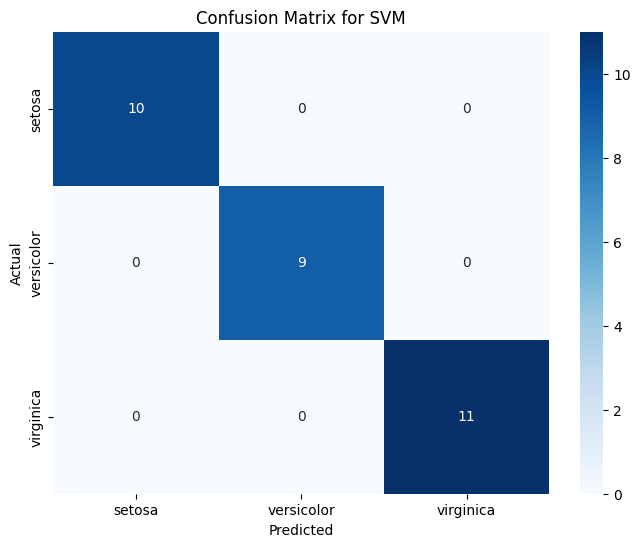

In [ ]:
# Import necessary libraries
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset (example with Iris dataset)
data = load_iris()
X = data.data
y = data.target

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the model
support_vector = LinearSVC()

# Fit the model with training data
support_vector.fit(x_train, y_train)

# Make predictions
y_pred_svm = support_vector.predict(x_test)

# Generate the confusion matrix
con_mat_svm = confusion_matrix(y_test, y_pred_svm)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(con_mat_svm, annot=True, fmt="d", cmap="Blues", xticklabels=data.target_names, yticklabels=data.target_names)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix for SVM')
plt.show()


# Accuracy Metrics for All Fitted Model

In [ ]:
#Creating a function to return all Models Accuracy Score

def accuracy_of_each_model(model,X_train,X_test):

  #predicting a train datas
  y_train_preds=model.predict(X_train)

  #predicting a test datas
  y_test_preds=model.predict(X_test)

  #storing all training scores
  train_scores=[]

  #storing all test scores
  test_scores=[]
  metrics=['Accuracy_Score','Precsion_Score','Recall_Score','Roc_Auc_Score']

  # Get the accuracy scores
  train_accuracy_score = accuracy_score(y_train,y_train_preds)
  test_accuracy_score = accuracy_score(y_test,y_test_preds)

  train_scores.append(train_accuracy_score)
  test_scores.append(test_accuracy_score)

  # Get the precision scores
  train_precision_score = precision_score(y_train,y_train_preds)
  test_precision_score = precision_score(y_test,y_test_preds)

  train_scores.append(train_precision_score)
  test_scores.append(test_precision_score)

  # Get the recall scores
  train_recall_score =recall_score(y_train,y_train_preds)
  test_recall_score =recall_score(y_test,y_test_preds)

  train_scores.append(train_recall_score)
  test_scores.append(test_recall_score)

  # Get the roc_auc scores
  train_roc_auc_score=roc_auc_score(y_train,y_train_preds)
  test_roc_auc_score =roc_auc_score(y_test,y_test_preds)

  train_scores.append(train_roc_auc_score)
  test_scores.append(test_roc_auc_score)

  return train_scores,test_scores,metrics

# **Conclusion**

Write the conclusion here.• Solo Lesisure has the highest value counts, we can conclude that most people who travel by airline travel is solo.37.22% people who travel by airline is solo. Followed by couple and family.

• We can conclude that most of the people around 78.44% people choose economy class to travel by airline. Followed by Business class and others.

• 50% passenger are giving 4.0 and 5.0 rating for cabin-service when overall rating of airline is good. So we can say good cabin-service positively impacts airline businesses.

• 30% people are not satisfied with entertainment service. As they give 1.0 rating.

• 38% people are giving 4.0 and 5.0 rating for seat comfort. So overall rating is bad. So we can say that bad value for entertainment service negatively impact airline business.

• 42% passengers gave an overall rating below 3.0 . So it, suggests that people are not very much satisfied with airline services. There are still need of improvements

• We performed Hyperparameter tuning using Grid search CV method for Decision Tree Model, Random Forest Model , K-Nearest Neighbour ,Support Vector Machine and Naive Bayes. To increase accuracy and avoid Overfitting Criteria, this is done.

• We have built classifier models using 6 different types of classifiers and all these are able to give accuracy of more than 90%.We can conclude that Logistic Regression gives the best model.

• Model evaluation metrics comparison, we can see that Support Vector Machine being the model with highest accuracy rate by a very small margin, works best among the experimented models for the given dataset.

• The most important feature are overall rating and Value for money that contribute to a model's prediction whether a passenger will recommended a particular airline to his/her friends.

• In order to increase their business or grow, our client must provide excellent cabin service, ground service, food-beverage entertainment, and seat comfort.



### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***